In [1]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np 
from scipy import signal
from torch.utils.data import Dataset, DataLoader

In [3]:
imgs = np.load('datasets/line_follow/imgs.npy')
pts = np.load('datasets/line_follow/pts.npy')

In [28]:
it = iter(range(22))

In [44]:
i = next(it)
mask = np.abs(pts[:, 0] - i) < 0.1
pt = pts[mask][:,1:] * 32

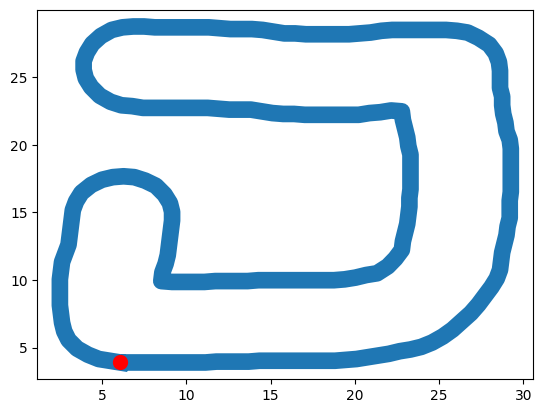

In [45]:
# plt.imshow(imgs[i])
plt.scatter(pt[0, 0], pt[0, 1], color='red', linewidth=5)
plt.plot(pt[:,0], pt[:,1], linewidth=12, zorder=0)


Animation saved as 'dot_movement.gif'


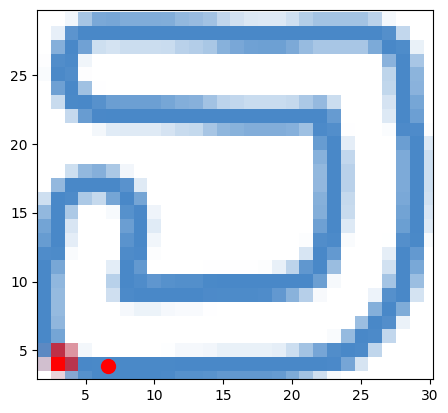

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Example array of (dx, dy) values as a NumPy array
# movements = np.diff(pt)
movements = np.diff(pt, axis=0)

# Initial position
initial_position = pt[0]

# Calculate cumulative positions
positions = np.cumsum(movements, axis=0) + initial_position

# Setup the plot
fig, ax = plt.subplots()
ax.set_xlim(np.min(positions[:, 0]) - 1, np.max(positions[:, 0]) + 1)
ax.set_ylim(np.min(positions[:, 1]) - 1, np.max(positions[:, 1]) + 1)
dot, = ax.plot([], [], 'ro', markersize=10)  # 'bo' represents a blue dot
# ax.plot(pt[:,0], pt[:,1], linewidth=12, zorder=0)
ax.imshow(out_image)

# Initialization function to set up the dot at the starting position
def init():
    dot.set_data([initial_position[0]], [initial_position[1]])
    return dot,

# Animation update function to move the dot
def update(frame):
    x, y = positions[frame]
    dot.set_data([x], [y])  # Pass lists or arrays to set_data
    return dot,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(positions), init_func=init, blit=True)

# Save the animation as a GIF
ani.save("dot_movement.gif", writer=PillowWriter(fps=15))

print("Animation saved as 'dot_movement.gif'")



In [136]:
import cv2
import numpy as np

# Load the image
image_path = "datasets/line_follow/imgs/line23.jpg"
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 50, 150)

# Find contours in the edge-detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour = max(contours, key=cv2.contourArea)

    # Specify the spacing for the points along the line
point_spacing = 10  # Adjust this to control the distance between points

# Sample points along the contour at regular intervals
points = []
for i in range(0, len(contour), point_spacing):
    x, y = contour[i][0]
    points.append((x, y))

# Create a blank white image with the same size as the original
out_image = np.ones_like(image) * 255

# Draw the contours on the white background

cv2.drawContours(out_image, contours, -1, (73, 136, 200), 30)  # Draw in black color with thickness 1
out_image = cv2.circle(out_image, (points[2][0],points[2][1]), radius=5, color=(255, 0, 0), thickness=20)
out_image = cv2.resize(out_image, (32, 32), interpolation=cv2.INTER_AREA)

# Save the result
# output_path = "a.jpg"
# cv2.imwrite(output_path, white_background)



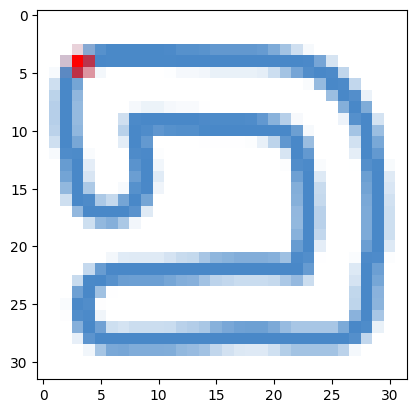

In [137]:
plt.imshow(out_image)

In [2]:
ims = np.load('datasets/line_follow/images.npy')
act = np.load('datasets/line_follow/actions.npy')

In [7]:
act

2

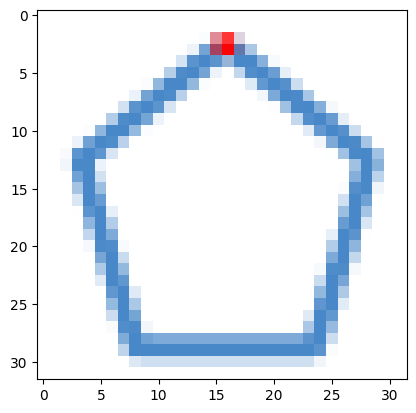

In [4]:
plt.imshow(ims[0])